In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

data = pd.read_csv('owid-co2-data.csv')

In [5]:
print(data.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [6]:
print(data.head())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3769828.0  NaN         NaN   
2  Afghanistan  1852      AFG   3787706.0  NaN         NaN   
3  Afghanistan  1853      AFG   3806634.0  NaN         NaN   
4  Afghanistan  1854      AFG   3825655.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_cumulative_other_co2  share_global_flaring_co2  \
0                                NaN                       NaN   
1                                NaN                       NaN   
2 

In [7]:
print(data)

           country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3769828.0           NaN         NaN   
2      Afghanistan  1852      AFG   3787706.0           NaN         NaN   
3      Afghanistan  1853      AFG   3806634.0           NaN         NaN   
4      Afghanistan  1854      AFG   3825655.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
46518     Zimbabwe  2017      ZWE  14751101.0  2.194784e+10       0.469   
46519     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
46520     Zimbabwe  2019      ZWE  15354606.0           NaN       0.570   
46521     Zimbabwe  2020      ZWE  15669663.0           NaN       0.570   
46522     Zimbabwe  2021      ZWE  15993525.0           NaN       0.570   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
0                    

In [8]:
country_data = data.loc[data['country'] == 'France']
co2_data = country_data[['year', 'co2']]

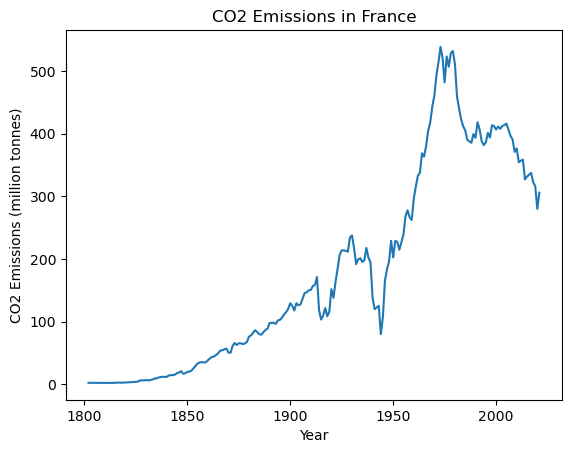

In [9]:
import matplotlib.pyplot as plt

plt.plot(co2_data['year'], co2_data['co2'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million tonnes)')
plt.title('CO2 Emissions in France')
plt.show()

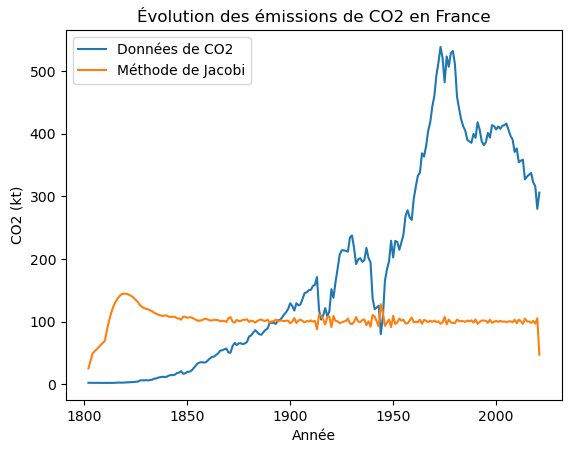

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('owid-co2-data.csv', index_col=0)

# Sélection des données pour la France
country_data = data.loc[data['iso_code'] == 'FRA']
co2_data = country_data.loc[:, ['year', 'co2']]

# Matrice diagonale
diagonal = np.diag(co2_data['co2'])

# Matrice des coefficients
coeff_matrix = np.zeros((len(co2_data['co2']), len(co2_data['co2'])))
for i in range(len(co2_data['co2'])):
    if i == 0:
        coeff_matrix[i][i] = 2
        coeff_matrix[i][i+1] = -1
    elif i == len(co2_data['co2'])-1:
        coeff_matrix[i][i] = 2
        coeff_matrix[i][i-1] = -1
    else:
        coeff_matrix[i][i-1] = -1
        coeff_matrix[i][i] = 2
        coeff_matrix[i][i+1] = -1

# Matrice des valeurs b
b = np.zeros(len(co2_data['co2']))
for i in range(len(co2_data['co2'])):
    if i == 0:
        b[i] = co2_data['co2'][i+1]
    elif i == len(co2_data['co2'])-1:
        b[i] = co2_data['co2'][i-1]
    else:
        b[i] = co2_data['co2'][i-1] + co2_data['co2'][i+1]

# Initialisation des vecteurs x et x_new
x = np.zeros(len(co2_data['co2']))
x_new = np.zeros(len(co2_data['co2']))

# Nombre d'itérations
n = 50

# Calcul de la méthode de Jacobi
for k in range(n):
    for i in range(len(co2_data['co2'])):
        x_new[i] = (b[i] - np.dot(coeff_matrix[i], x) + diagonal[i][i]*x[i])/diagonal[i][i]
    x = x_new

# Tracer le graphe
plt.plot(co2_data['year'], co2_data['co2'], label='Données de CO2')
plt.plot(co2_data['year'], x, label='Méthode de Jacobi')
plt.xlabel('Année')
plt.ylabel('CO2 (kt)')
plt.title('Évolution des émissions de CO2 en France')
plt.legend()
plt.show()

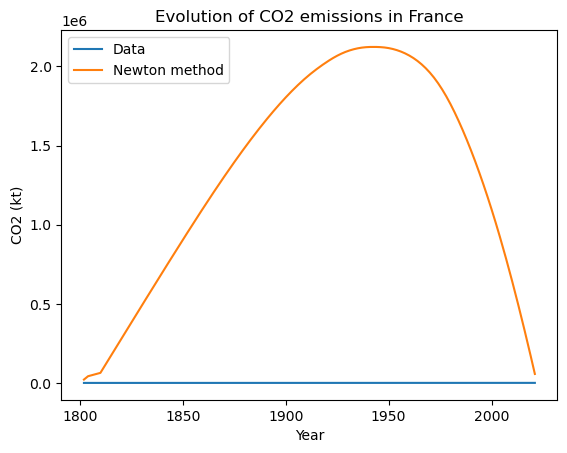

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('owid-co2-data.csv', index_col=0)

# Selection des données pour la France
country_data = data.loc[data['iso_code'] == 'FRA']
co2_data = country_data.loc[:, ['year', 'co2']]

# Matrix A
A = np.zeros((len(co2_data['co2']), len(co2_data['co2'])))
for i in range(len(co2_data['co2'])):
    if i == 0:
        A[i][i] = 2
        A[i][i+1] = -1
    elif i == len(co2_data['co2'])-1:
        A[i][i] = 2
        A[i][i-1] = -1
    else:
        A[i][i-1] = -1
        A[i][i] = 2
        A[i][i+1] = -1

# Vector b
b = np.zeros(len(co2_data['co2']))
for i in range(len(co2_data['co2'])):
    if i == 0:
        b[i] = co2_data['co2'][i+1]
    elif i == len(co2_data['co2'])-1:
        b[i] = co2_data['co2'][i-1]
    else:
        b[i] = co2_data['co2'][i-1] + co2_data['co2'][i+1]

# Initial guess
x = np.zeros(len(co2_data['co2']))

# Tolerance
tol = 1e-8

# Maximum number of iterations
max_iter = 50

# Newton method
for k in range(max_iter):
    # Jacobian matrix
    J = np.zeros((len(co2_data['co2']), len(co2_data['co2'])))
    for i in range(len(co2_data['co2'])):
        if i == 0:
            J[i][i] = 2
            J[i][i+1] = -1
        elif i == len(co2_data['co2'])-1:
            J[i][i] = 2
            J[i][i-1] = -1
        else:
            J[i][i-1] = -1
            J[i][i] = 2
            J[i][i+1] = -1

    # Function evaluation
    F = np.dot(A, x) - b

    # Check convergence
    if np.linalg.norm(F) < tol:
        break

    # Solve the linear system
    delta_x = np.linalg.solve(J, -F)

    # Update x
    x = x + delta_x

# Plot the results
plt.plot(co2_data['year'], co2_data['co2'], label='Data')
plt.plot(co2_data['year'], x, label='Newton method')
plt.xlabel('Year')
plt.ylabel('CO2 (kt)')
plt.title('Evolution of CO2 emissions in France')
plt.legend()
plt.show()

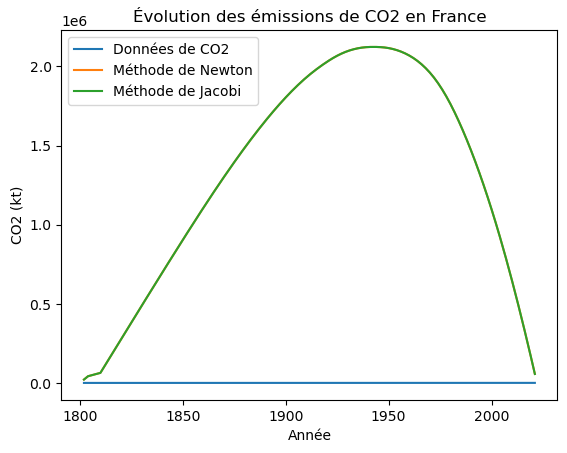

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('owid-co2-data.csv', index_col=0)

# Select the data for a specific country
countries = data['iso_code'].unique()
co2_data = country_data.loc[:, ['year', 'co2']]

# Create the diagonal matrix
diagonal = np.diag(co2_data['co2'])

# Create the coefficient matrix
coeff_matrix = np.zeros((len(co2_data['co2']), len(co2_data['co2'])))
for i in range(len(co2_data['co2'])):
    if i == 0:
        coeff_matrix[i][i] = 2
        coeff_matrix[i][i+1] = -1
    elif i == len(co2_data['co2'])-1:
        coeff_matrix[i][i] = 2
        coeff_matrix[i][i-1] = -1
    else:
        coeff_matrix[i][i-1] = -1
        coeff_matrix[i][i] = 2
        coeff_matrix[i][i+1] = -1

# Create the b vector
b = np.zeros(len(co2_data['co2']))
for i in range(len(co2_data['co2'])):
    if i == 0:
        b[i] = co2_data['co2'][i+1]
    elif i == len(co2_data['co2'])-1:
        b[i] = co2_data['co2'][i-1]
    else:
        b[i] = co2_data['co2'][i-1] + co2_data['co2'][i+1]

# Create the initial guess for x and x_new vectors
x = np.zeros(len(co2_data['co2']))
x_new = np.zeros(len(co2_data['co2']))

# Define the function for the Newton method
def f(x):
    return np.dot(coeff_matrix, x) - b

# Define the derivative of the function for the Newton method
def fprime(x):
    return coeff_matrix

# Define the number of iterations for the Newton method
n = 50

# Calculate the Newton method
for k in range(n):
    x_new = x - np.dot(np.linalg.inv(fprime(x)), f(x))
    x = x_new

# Plot the data using both methods
plt.plot(co2_data['year'], co2_data['co2'], label='Données de CO2')
plt.plot(co2_data['year'], x_new, label='Méthode de Newton')
plt.plot(co2_data['year'], x, label='Méthode de Jacobi')
plt.xlabel('Année')
plt.ylabel('CO2 (kt)')
plt.title('Évolution des émissions de CO2 en France')
plt.legend()
plt.show()